In [1]:
from experiment import evaluate_algorithm
from algorithms import (
    E00PerfectAlgorithm,
    E01SimpleAlgorithm,
    E02SimpleAlgorithmRecallingMean,
    E03ShiftedStories,
    E04LossFN,
    E05LossFNShifted,
    E06LinearRegression,
)

# E00PerfectAlgorithm
This algorithm just uses the real length and the real sizes to prove that achieving perfect score is possible. It fails two sprints likely because of the sprints whose first story contains more points than the length of the sprint itself.

Total regret: 0; Nailed Sprints 5000; Sprints overshoot 0


count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: point_distance, dtype: float64

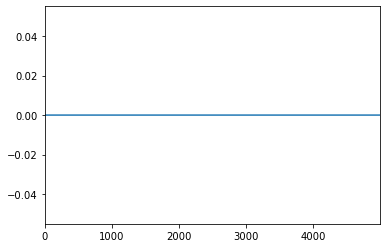

In [2]:

ev = evaluate_algorithm(E00PerfectAlgorithm)
ev.describe()

In [3]:
ev.sprints_overshoot()

0

# E01SimpleAlgorithm
The algorithm that just assumes that every person does 1 point per day and does not care about real lengths or sizes.

Total regret: 90330; Nailed Sprints 76; Sprints overshoot 4703


count    5000.000000
mean      -12.147000
std         7.894242
min       -46.000000
25%       -17.000000
50%       -12.000000
75%        -7.000000
max        17.000000
Name: point_distance, dtype: float64

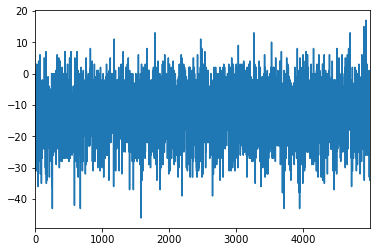

In [4]:
ev = evaluate_algorithm(E01SimpleAlgorithm)
ev.describe()

In [5]:
ev.sprints_overshoot()

4703

# E02SimpleAlgorithmRecallingMean

Total regret: 76933; Nailed Sprints 110; Sprints overshoot 4578


count    5000.000000
mean      -10.846600
std         7.831152
min       -45.000000
25%       -16.000000
50%       -10.000000
75%        -6.000000
max        17.000000
Name: point_distance, dtype: float64

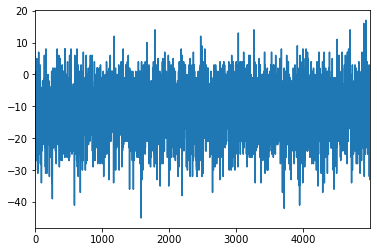

In [6]:
ev = evaluate_algorithm(E02SimpleAlgorithmRecallingMean)
ev.describe()

In [7]:
ev.sprints_overshoot()

4578

# E03ShiftedStories
Shifted stories approach shifts up the estimated sizes of the stories proportionally to their size and then estimates the length of the sprint in a similar way to that of `E02SimpleAlgorithmRecallingMean`

Total regret: 13239; Nailed Sprints 329; Sprints overshoot 2279


count    5000.000000
mean        0.035200
std         6.579743
min       -25.000000
25%        -4.000000
50%         0.000000
75%         4.000000
max        27.000000
Name: point_distance, dtype: float64

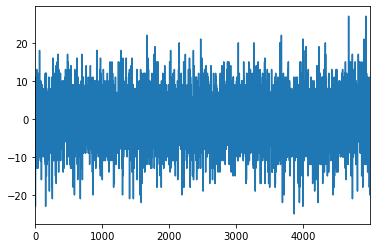

In [8]:
ev = evaluate_algorithm(E03ShiftedStories)
ev.describe()

In [9]:
ev.sprints_overshoot()

2279

# E04LossFn
This algorithm exploits the fact that the evaluator will use a regret matrix to estimate our penalisation and replicates such matrix in the decision. To minimise the regret it accepts a `regret_factor` that allows us to make the regret function more or less dramatic.

**Loss function approach with memory learning regret:**
Given that we allow a regret factor it would be great to learn its value for each sprint. To do so we come up with a bayesian estimation between what we chose in the past and what we should have chosen (the factor that would have returned exactly the length). However, this didn't work very well, 69k regret and 102 nailed sprints, mainly because of two reasons:
- We weren't including in our computations the uncertainty of the stories.
- The `estimate_length` method was unable to reach the real points in the sprint

Total regret: 13438; Nailed Sprints 262; Sprints overshoot 1902


count    5000.000000
mean        1.056800
std         6.816954
min       -25.000000
25%        -3.000000
50%         2.000000
75%         6.000000
max        27.000000
Name: point_distance, dtype: float64

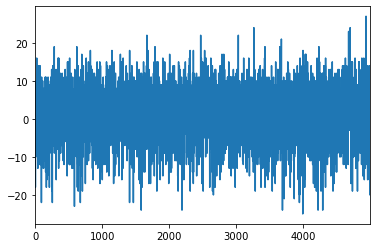

In [10]:
ev = evaluate_algorithm(E04LossFN, regret_factor=7.5)
ev.describe()

Total regret: 12148; Nailed Sprints 267; Sprints overshoot 1609


count    5000.000000
mean        2.135400
std         6.688409
min       -24.000000
25%        -2.000000
50%         3.000000
75%         7.000000
max        25.000000
Name: point_distance, dtype: float64

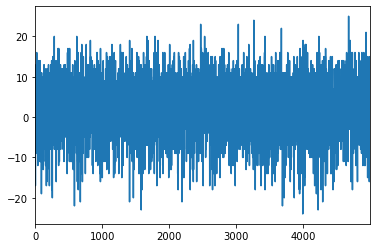

In [12]:
ev = evaluate_algorithm(E04LossFN, regret_factor=8)
ev.describe()

# E05LossFnShifted
Shifted stories worked rather well and also the loss function so in this algorithm we will mix both to reduce a bit more the regret.

Total regret: 13019; Nailed Sprints 344; Sprints overshoot 2242


count    5000.000000
mean        0.174200
std         6.598861
min       -25.000000
25%        -4.000000
50%         0.000000
75%         5.000000
max        28.000000
Name: point_distance, dtype: float64

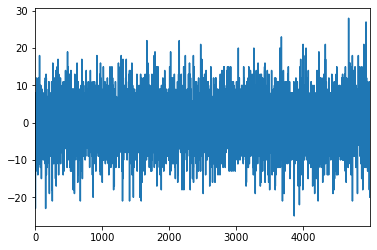

In [14]:
ev = evaluate_algorithm(E05LossFNShifted, regret_factor=.8)
ev.describe()

Total regret: 10823; Nailed Sprints 300; Sprints overshoot 1668


count    5000.000000
mean        2.074000
std         6.468268
min       -22.000000
25%        -2.000000
50%         2.000000
75%         6.000000
max        30.000000
Name: point_distance, dtype: float64

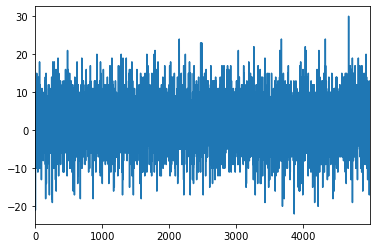

In [16]:
ev = evaluate_algorithm(E05LossFNShifted, regret_factor=1.6)
ev.describe()

Total regret: 10253; Nailed Sprints 264; Sprints overshoot 1214


count    5000.000000
mean        3.706600
std         6.369257
min       -21.000000
25%         0.000000
50%         4.000000
75%         8.000000
max        33.000000
Name: point_distance, dtype: float64

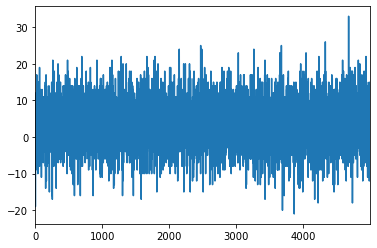

In [18]:
ev = evaluate_algorithm(E05LossFNShifted, regret_factor=2.5)
ev.describe()

# E06LinearRegression

Total regret: 8311; Nailed Sprints 300; Sprints overshoot 1250


count    5000.000000
mean        3.156000
std         5.544205
min       -31.000000
25%        -0.250000
50%         3.000000
75%         7.000000
max        26.000000
Name: point_distance, dtype: float64

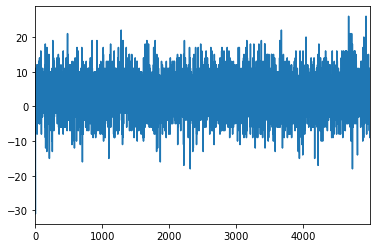

In [20]:
ev = evaluate_algorithm(E06LinearRegression)
ev.describe()